<a href="https://colab.research.google.com/github/7ZXU/AI/blob/main/HandsOnMachineLearning/HandsOnCh12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**11.1 MLP 모델에 학습 개선 방법 적용하기**

1. 가중치 함수 초기화
2. 활성화 함수 
3. 최적화
4. 배치정규화
5. 드롭아웃





##**baseMLP 모델 만들기**

**MNIST 데이터셋 불러오기**

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


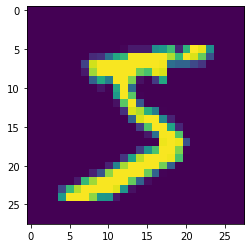

Label : 5


In [ ]:
plt.imshow(X_train[0]) 
plt.show() #그래프 출력
print('Label :', y_train[0]) #레이블 출력

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

#reshaping X data (n, 28, 28) -> (n, 784)
X_train = X_train.reshape((X_train.shape[0],-1)) ##열이 가변적 
X_test = X_test.reshape((X_test.shape[0], -1)) ##########################원래 (19800,784)인데 이거 왜 하는거지?


#학습 과정을 단축하기 위해 학습 데이터의 1/3만 활용
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size=0.67, random_state=7)
######################## _ ? random_state?
######################## test_size = 0.67이어서 1/3인거야?

#타겟 변수를 one-hot encoding 한다
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


In [ ]:
#MLP (4 hidden layers)
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs=100, verbose=0)

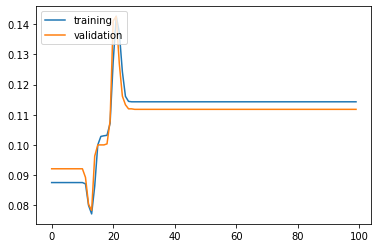

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 2.2999 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


##**가중치 초기화**

In [ ]:
def mlp_model():
    #use he_normal initializer
    #before activation function
    model = Sequential()
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(Activation('sigmoid'))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

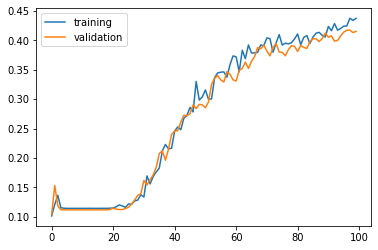

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.8662 - accuracy: 0.4176
Test accuracy: 0.41760000586509705


##**활성화 함수**

In [ ]:
def mlp_model_relu():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model_relu()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

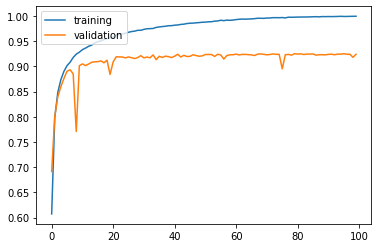

In [ ]:
plt.plot(history.history['accuracy']) #####################history.history?
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4932 - accuracy: 0.9225
Test accuracy: 0.9225000143051147


##**옵티마이저**

In [ ]:
def mlp_model_optimizer():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr = 0.001)
    #많이 사용하는 활성화 함수 #Adam #RMSProp
    #############################RMSProp
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model_optimizer()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

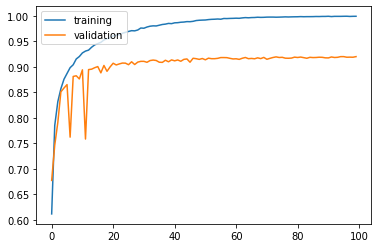

In [ ]:
plt.plot(history.history['accuracy']) #####################history.history?
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.5412 - accuracy: 0.9178
Test accuracy: 0.9178000092506409


##**배치정규화**

In [ ]:
from keras.layers import BatchNormalization
def mlp_model_BN():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr = 0.001)
    #많이 사용하는 활성화 함수 #Adam #RMSProp
    #############################RMSProp
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model_BN()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

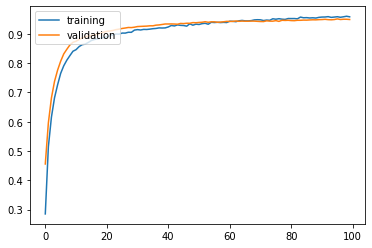

In [ ]:
plt.plot(history.history['accuracy']) #####################history.history?
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1637 - accuracy: 0.9486
Test accuracy: 0.9485999941825867


##**드랍아웃**

In [ ]:
from keras.layers import Dropout
def mlp_model_dropout():
    model = Sequential()
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) #erasing node as probability 0.2
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50)) 
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    RMSProp = optimizers.RMSprop(lr = 0.001)
    #많이 사용하는 활성화 함수 #Adam #RMSProp
    #############################RMSProp
    model.compile(optimizer = sgd, loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

In [ ]:
model = mlp_model_dropout()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

In [ ]:
plt.plot(history.history['accuracy']) #####################history.history?
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left') #레전드 #왼쪽 위 네모박스
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy:', results[1])

##**그래디언트 클리핑**

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) #set clipvalue for gradient clipping
model.compile(loss="mse", optimizer=optimizer)

#**11.2 전이학습**

##**11.2.1 케라스를 사용한 전이학습**
일반적인 특정을 감지하는 경향

= 심층 합성곱 신경망에서 잘 동작

예시는 부적절

- 작은 네트워크 : 패턴 수를 적게 학습

- 완전 연결 네트워크 : 특정 패턴 학습

In [ ]:
from tensorflow import keras

In [ ]:
array = ([1, 2, 3], [4, 5, 6], [7, 8, 9])
array[ : -1]

([1, 2, 3], [4, 5, 6])

In [ ]:
model_A=keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) #################
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

OSError: ignored

In [ ]:
#clone model A
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False 
    #reuse layer freezing
    #give time for training model B 
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

for layer in moder_B_on_A.layers[:-1]:
    layer.trainable = True 
    #동결 해제 
optimizer = keras.optimizers.SGD(lr=1e-4)
#학습률을 낮추는 것이 좋음
#세밀하게 튜닝하기 위해서 
#기본 학습률 = 1e-2

model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

#**11.3 고속 옵티마이저**

### 11.3.1 모멘텀 최적화

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, ,momentum=0.9)

##11.3.2 네스테로프 가속 경사

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

##11.3.3 AdaGrad

##11.3.4 RMSProp

In [ ]:
optimizer = keras.optimizers.RMSProp(lr=0.001, rho=0.9)

##11.3.5 Adam과 Nadam 최적화

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=-0.9, beta_2=0.999)

##11.3.6 학습률 스케줄링

In [ ]:
#거듭제곱 기반 스케줄링
#decay : 학습률을 나누기 위해 수행할 스텝 수(s)의 역수
optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-4)

#지수기반 스케줄링
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
            return lr0 *0.1**(epoch/s)

    return exponential_decay_fn

#구간별 고정 스케줄링 
def piecewise_constant_fn(epoch):
    if epoch < 5 : 
        return 0.01
    elif epoch < 15 :
        return 0.005
    else:
        return 0.001

#성능 기반 스케줄링 
##ReduceLROnPlateau : patience 동안 성능이 향상되지 않으면 학습률에 0.5 곱함
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience = 5)
##LearningRateScheduler : 에포크마다 학습률 업데이트
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn) 

#실제 적용 방법
exponential_decay_fn = exponential_decay(lr0 = 0.01, s = 20) #지수 기반 스케줄링
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn) #에포크마다 학습률 업데이트
history = model.fit(X_train_scaled, y_train, epochs = 20,
                    validation_data = (X_valid_scaled, y_valid)
                    callbacks = [lr_scheduler]
                    )



NameError: ignored

#**11.4 규제를 사용해 과대적합 피하기**

##11.4.2 L1, L2 규제

In [ ]:
layer = tf.keras.layers.Dense(100, activation = 'relu',
                              kernel_initializer = "he_normal",
                              kernel_regularizer = tf.keras.regularizers.l2(0.02)

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation = 'relu',
                           kernel_initializer = "he_normal",
                           kernel_regularizer = tf.keras.regularizers.l2(0.02))


model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape = [28, 28]),
                RegularizedDense(300),
                RegularizedDense(100),
                RegularizedDense(10, activation = 'softmax',
                                 kernel_initializer = 'glorot_uniform')
                ])

##11.4.2 드롭아웃

In [ ]:
model = tf.keras.models.Sequential([
           tf.keras.layers.Flatten(input_shape = [28, 28]),
           tf.keras.layers.Dropout(rate = 0.2),
           tf.keras.layers.Dense(300, kernel_initializer='he_normal'),
           tf.keras.layers.Dropout(rate = 0.2),
           tf.keras.layers.Activation("elu"),
           tf.keras.layers.Dense(100, kernel_initializer='he_normal'),
           tf.keras.layers.Dropout(rate = 0.2),
           tf.keras.layers.Dense(10, activation='softmax')
           ])

model.summary()

##11.4.3 몬테 카를로 드롭아웃

In [ ]:
import numpy as np

y_probas = np.stack([model(X_test_scaled, training=True)
for sample in range(100)])

y_proba = y_probas.mean(axis=0)

In [ ]:
class MCDropout(keras.layers.Dropout):
  def call(self, inputs):
    return super().call(inputs, training=True)

##11.4.4 맥스-노름 규제

In [ ]:
tf.keras.layers.Dense(100, activation='elu',
                      kernel_initializer = 'he_normal',
                      kernel_constraint=tf.keras.constraints.max_norm(1.))